# Face Recognition

Ahmed Amer, Nicholas Lee, Christian Valdez

we are using the ATT face database in the data folder

Three methods are implemented and compared in the following order:
- LBP
- Neural Networks
- SVM

## Importing Data

In [29]:
import os
from glob import glob

from skimage.io import imread
from skimage.feature import local_binary_pattern

import cv2
import numpy as np
import matplotlib.pyplot as plt
# import data - can probably copy from lab 6

In [30]:
#constants
NUM_OF_SUBJECT = 40
NUM_OF_SAMPLES_PER_SUBJECT = 10

## LBP - Christian Valdez

Process images and set up inputs for Nick and Ahmed

we will make 4 models total, 2 using LBP and 2 using images as given

In [35]:
def read_pgm(dataset_path: str):
    '''reads pgm file'''

    try:
        # print(f'reading {dataset_path}')
        # img = cv2.imread(dataset_path, 1)
        img = imread(dataset_path, as_gray=True)

    except Exception as error:
        print(f'{error}: {dataset_path} not found, skipping')

    else:
        return img

    
def make_gallery(path_prefix: str, pgm_filename: list[int], number_of_bins=16, number_of_points=12, radius_of_circle=3, showimage=False) -> list:
    '''

        Description
        ================================================
        creates gallery of lbp and labels
        
        ...

        calls the function read_pgm to read pgm file using imread from skimage
        returns list of lbp and list of labels

        Variable Description
        ================================================
        P:                  Number of circularly symmetric neighbor set points
        Q:                  Radius of circle
        subject_samples:    list of paths

    '''

    filename_start = pgm_filename[0]
    filename_end = pgm_filename[1]

    # LBP parameters
    p = number_of_points      # number of points (higher means more detailed and fine grained))
    q = radius_of_circle       #radius of circle

    subject_samples = [f'{path_prefix}/{sample_number}.pgm' for sample_number in range(filename_start, filename_end)]

    lbp_gallery = []
    labels = []

    for sample in subject_samples:
        sample_id = sample.split('/')
        id = sample_id[2][1:]
        sample_id_indx = sample_id[-1].replace('.pgm', '')

        img = read_pgm(sample)
        lbp = local_binary_pattern(img, p, q)

        # lbp_gallery.append(lbp)
        # labels.append(f'{id}')
        num_bins = number_of_bins
        hist, _ = np.histogram(lbp.ravel(), bins=num_bins, range=(0, num_bins))
        lbp_gallery.append(hist)
        labels.append(f'{id}')

        if showimage:
            plt.imshow(img, cmap='gray')
            plt.imshow(lbp)
    
    return np.array(lbp_gallery), np.array(labels)

def make_gallery_withoutLBP(path_prefix: str, pgm_filename: list[int], showimage=False) -> list:
    '''

        Description
        ================================================
        creates gallery of images and labels
        
        ...

        calls the function read_pgm to read pgm file using imread from skimage
        returns list of images and list of labels

        Variable Description
        ================================================
        subject_samples:    list of paths

    '''

    filename_start = pgm_filename[0]
    filename_end = pgm_filename[1]

    subject_samples = [f'{path_prefix}/{sample_number}.pgm' for sample_number in range(filename_start, filename_end)]

    image_gallery = []
    labels = []

    for sample in subject_samples:
        sample_id = sample.split('/')
        id = sample_id[2][1:]
        sample_id_indx = sample_id[-1].replace('.pgm', '')

        img = read_pgm(sample)

        image_gallery.append(img)

        labels.append(f'{id}')
        
        if showimage:
            plt.imshow(img, cmap='gray')
    
    return np.array(image_gallery)[:,:,0], np.array(labels)





['1' '1' '1' '1' '1']
(16,)


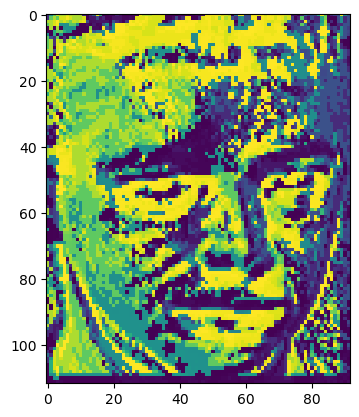

In [36]:
#testing functions above

# function with LBP

train_path = './Data/s'

for subject in range(1, NUM_OF_SUBJECT):
    '''
        TODO: test for one subject and make sure it's right
    '''
    path_prefix = f'{train_path}{subject}'
    
    train_data, train_label = make_gallery(path_prefix, [1, NUM_OF_SAMPLES_PER_SUBJECT//2+1], showimage=True)
    test_data, test_label = make_gallery(path_prefix, [NUM_OF_SAMPLES_PER_SUBJECT//2+1, NUM_OF_SAMPLES_PER_SUBJECT+1], showimage=True)
    print(test_label)
    print(train_data[0].shape)
    
    break


['1' '1' '1' '1' '1']
(112,)


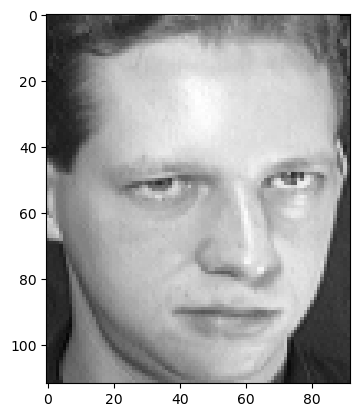

In [38]:
# funciton without LBP

for subject in range(1, NUM_OF_SUBJECT):
    '''
        TODO: test for one subject and make sure it's right
    '''
    path_prefix = f'{train_path}{subject}'
    
    train_data, train_label = make_gallery_withoutLBP(path_prefix, [1, NUM_OF_SAMPLES_PER_SUBJECT//2+1], showimage=True)
    test_data, test_label = make_gallery_withoutLBP(path_prefix, [NUM_OF_SAMPLES_PER_SUBJECT//2+1, NUM_OF_SAMPLES_PER_SUBJECT+1], showimage=True)
    print(test_label)
    print(train_data[0].shape)
    
    break

## Neural Networks - MLP

train model using LBP

train model using images

compare each to each other

#### MLP using LBP

##### baseline

LBP parameters
number_of_points = 12
radius_of_circle = 3
number_of_bins = 16

MLP parameters
hidden_layer_sizes = (128, 64, 128)
learning_rate_init = 0.001
random_state = 1

In [39]:
# Neural Network

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#constants
NUM_OF_SUBJECT = 40
NUM_OF_SAMPLES_PER_SUBJECT = 10

data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []

for subject in range(1, NUM_OF_SUBJECT):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)




In [40]:
# create a MLPClassifier with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

# train the MLPClassifier on the training data
mlp.fit(train_data, train_label)

# predict the labels for the test data
# predict the labels for the test data
prediction = mlp.predict(test_data)

# calculate the accuracy of the MLPClassifier
accuracy = accuracy_score(test_label, prediction)

print(f"Accuracy: {accuracy}")


Accuracy: 0.1794871794871795


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##### lets try to improve

optimize number of bins

In [46]:
# number_of_points = 12, radius_of_circle = 3, number_of_bins = 4 - 100

#constants
NUM_OF_SUBJECT = 40
NUM_OF_SAMPLES_PER_SUBJECT = 10

data_path = './Data/s'

accuracyList_withLBP_BIN = []

for num_bins in range(1, 300):
    if num_bins % 10 != 0:
        continue
    train_data = []
    train_label = []
    test_data = []
    test_label = []

    for subject in range(1, NUM_OF_SUBJECT):

        path_prefix = f'{data_path}{subject}'

        # 60% of the data is used for training and 40% for testing
        subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6], num_bins)
        subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1], num_bins)

        train_data.extend(subject_train_data)
        train_label.extend(subject_train_label)
        test_data.extend(subject_test_data)
        test_label.extend(subject_test_label)

    # create a MLPClassifier with 3 hidden layers
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

    # train the MLPClassifier on the training data
    mlp.fit(train_data, train_label)

    # predict the labels for the test data
    # predict the labels for the test data
    prediction = mlp.predict(test_data)

    # calculate the accuracy of the MLPClassifier
    accuracy = accuracy_score(test_label, prediction)
    accuracyList_withLBP_BIN.append((accuracy, num_bins))

    # print(f"Accuracy: {accuracy}") 

highest_accuracy_index = max(range(len(accuracyList_withLBP_BIN)), key=lambda i: accuracyList_withLBP_BIN[i][0])
print("highest accuacy is {}, with number_of_bins {}".format(accuracyList_withLBP_BIN[highest_accuracy_index][0], accuracyList_withLBP_BIN[highest_accuracy_index][1]))



/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


highest accuacy is 0.5846153846153846, with number_of_bins 190


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


modifying LBP parameters

since the best number of bins was around 190, we will use that.

number_of_points = 9 - 16
radius_of_circle = 1 - 6

In [47]:
#constants
NUM_OF_SUBJECT = 40
NUM_OF_SAMPLES_PER_SUBJECT = 10

data_path = './Data/s'

accuracyList_withLBP_Params = []

for p in range(8, 14):
    for q in range(1, 7):
        train_data = []
        train_label = []
        test_data = []
        test_label = []

        for subject in range(1, NUM_OF_SUBJECT):

            path_prefix = f'{data_path}{subject}'

            # 60% of the data is used for training and 40% for testing
            subject_train_data, subject_train_label = make_gallery(path_prefix, [1, 6],190, p, q,)
            subject_test_data, subject_test_label = make_gallery(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1],190, p, q)

            train_data.extend(subject_train_data)
            train_label.extend(subject_train_label)
            test_data.extend(subject_test_data)
            test_label.extend(subject_test_label)

        # create a MLPClassifier with 3 hidden layers
        mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

        # train the MLPClassifier on the training data
        mlp.fit(train_data, train_label)

        # predict the labels for the test data
        # predict the labels for the test data
        prediction = mlp.predict(test_data)

        # calculate the accuracy of the MLPClassifier
        accuracy = accuracy_score(test_label, prediction)
        accuracyList_withLBP_Params.append((accuracy, p, q))

        # print(f"Accuracy: {accuracy}")

highest_accuracy_index = max(range(len(accuracyList_withLBP_Params)), key=lambda i: accuracyList_withLBP_Params[i][0])
print("highest accuacy is {}, with p of {}, and q of {}".format(accuracyList_withLBP_Params[highest_accuracy_index][0], accuracyList_withLBP_Params[highest_accuracy_index][1], accuracyList_withLBP[highest_accuracy_index][2]))





/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


highest accuacy is 0.6974358974358974, with p of 10, and q of 5


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### MLP without LBP

reading ./Data/s1/1.pgm
reading ./Data/s1/2.pgm
reading ./Data/s1/3.pgm
reading ./Data/s1/4.pgm
reading ./Data/s1/5.pgm
reading ./Data/s1/6.pgm
reading ./Data/s1/7.pgm
reading ./Data/s1/8.pgm
reading ./Data/s1/9.pgm
reading ./Data/s1/10.pgm
reading ./Data/s2/1.pgm
reading ./Data/s2/2.pgm
reading ./Data/s2/3.pgm
reading ./Data/s2/4.pgm
reading ./Data/s2/5.pgm
reading ./Data/s2/6.pgm
reading ./Data/s2/7.pgm
reading ./Data/s2/8.pgm
reading ./Data/s2/9.pgm
reading ./Data/s2/10.pgm
reading ./Data/s3/1.pgm
reading ./Data/s3/2.pgm
reading ./Data/s3/3.pgm
reading ./Data/s3/4.pgm
reading ./Data/s3/5.pgm
reading ./Data/s3/6.pgm
reading ./Data/s3/7.pgm
reading ./Data/s3/8.pgm
reading ./Data/s3/9.pgm
reading ./Data/s3/10.pgm
reading ./Data/s4/1.pgm
reading ./Data/s4/2.pgm
reading ./Data/s4/3.pgm
reading ./Data/s4/4.pgm
reading ./Data/s4/5.pgm
reading ./Data/s4/6.pgm
reading ./Data/s4/7.pgm
reading ./Data/s4/8.pgm
reading ./Data/s4/9.pgm
reading ./Data/s4/10.pgm
reading ./Data/s5/1.pgm
reading ./Da

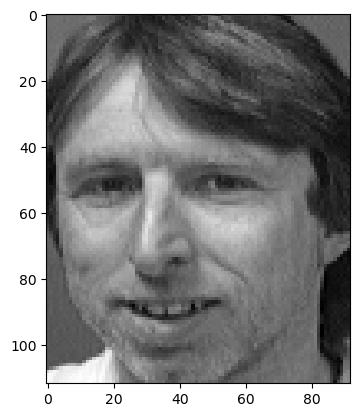

In [ ]:
#constants
NUM_OF_SUBJECT = 40
NUM_OF_SAMPLES_PER_SUBJECT = 10

data_path = './Data/s'

train_data = []
train_label = []
test_data = []
test_label = []

for subject in range(1, NUM_OF_SUBJECT):

    path_prefix = f'{data_path}{subject}'

    # 60% of the data is used for training and 40% for testing
    subject_train_data, subject_train_label = make_gallery_withoutLBP(path_prefix, [1, 6])
    subject_test_data, subject_test_label = make_gallery_withoutLBP(path_prefix, [6, NUM_OF_SAMPLES_PER_SUBJECT+1])

    train_data.extend(subject_train_data)
    train_label.extend(subject_train_label)
    test_data.extend(subject_test_data)
    test_label.extend(subject_test_label)

In [ ]:
# create a MLPClassifier with 3 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 128), learning_rate_init=0.001, random_state=1)

# train the MLPClassifier on the training data
mlp.fit(train_data, train_label)

# predict the labels for the test data
# predict the labels for the test data
prediction = mlp.predict(test_data)

# calculate the accuracy of the MLPClassifier
accuracy = accuracy_score(test_label, prediction)

print(f"Accuracy: {accuracy}")

Accuracy: 0.24102564102564103


/Users/nicholaslee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## SVM - Ahmed Amer

train model using LBP

train model using images

compare each to each other

In [ ]:
#svm

## Comparison of all methods (4 models)

In [ ]:
# comparison